# ThorDelayAnalysis
---

## Common delay I/O
\begin{equation}
    \displaystyle y(n) = \sum_{m = 0}^{M} a^{m} x(n - md)
\end{equation}

## Thor's delay
![DelayPanel](Fig\DelayPanel)
### Parameters
|Name|Unit|Min val|Max val|
|:--:|:--:|:--:|:--:|
|TIME|Hz|0|1000|
|F.BACK|-|0|127|
|RATE|Hz|0.14|18.2|
|AMT|-|0|127|
|D.WET|-|0|127|

## Rec IR
### Conditions
InputSignal: Impulse Train (freq. 1 Hz, fs 48 kHz, bit 16, len 10 sec, Mono)  
OutSignal: Input(Mono) -> Thor Filter3 (L & R) -> Thor Delay -> Out (Stereo)

#### Looting
![BackPanel](Fig\BackPanel)
![Looting](Fig\Looting)

#### Rec IRs
![InpulseRec](Fig\InpulseRec)

### Analysis of "TIME" parameter dependence
|Entry|TIME|F.BACK|RATE|AMT|D.WET|
|:--:|:--:|:--:|:--:|:--:|:--:|
|T_1|0|0|0.14|0|127|
|T_2|197|0|0.14|0|127|
|T_3|402|0|0.14|0|127|
|T_4|606|0|0.14|0|127|
|T_5|803|0|0.14|0|127|

#### Convert TIME [msec] to [sample]

In [1]:
import pandas as pd

def msec_to_sample_fs48kHz(t_msec):
    return t_msec / 1000.0 * 48000

T_msec = [0, 197, 402, 606, 803]
T_samp = [msec_to_sample_fs48kHz(x) for x in T_msec]

index_label = ["T_1", "T_2", "T_3", "T_4", "T_5"]
df = pd.DataFrame({"msec": T_msec, "sample": T_samp}, index = index_label)

df

,msec,sample
T_1,0,0.0
T_2,197,9456.0
T_3,402,19296.0
T_4,606,29088.0
T_5,803,38544.0


#### Data plot

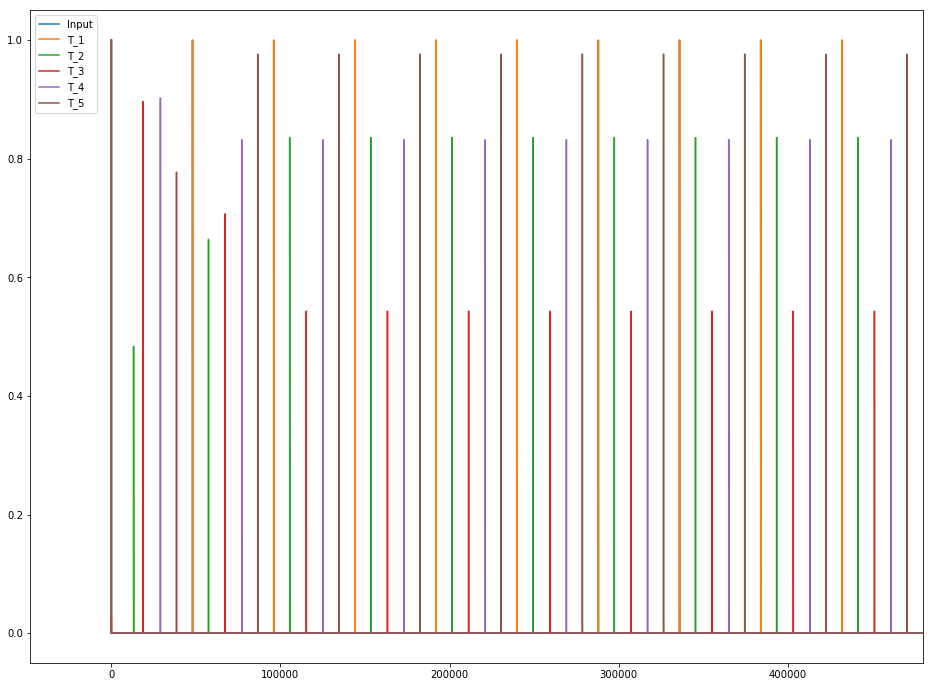

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf
%matplotlib inline

input_inpulse, _ = sf.read("ImpulseTrain_fs48kHz_p1sec_len10sec.wav")
T_1, _ = sf.read("IR\T_1.wav")
T_2, _ = sf.read("IR\T_2.wav")
T_3, _ = sf.read("IR\T_3.wav")
T_4, _ = sf.read("IR\T_4.wav")
T_5, _ = sf.read("IR\T_5.wav")

plt.figure(figsize = (16, 12))
plt.plot(range(input_inpulse.size), input_inpulse, label = "Input")
plt.plot(range(T_1[:, 0].size), T_1[:, 0], label = "T_1")
plt.plot(range(T_2[:, 0].size), T_2[:, 0], label = "T_2")
plt.plot(range(T_3[:, 0].size), T_3[:, 0], label = "T_3")
plt.plot(range(T_4[:, 0].size), T_4[:, 0], label = "T_4")
plt.plot(range(T_5[:, 0].size), T_5[:, 0], label = "T_5")
plt.xlim(-48000, 48000 * 10)
plt.legend()
plt.show()